In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')
seed = 3

In [40]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train.name = 'Training Set'
df_test.name = 'Test Set'

outliers = [30, 88, 462, 631, 1322]
df_train = df_train.drop(df_train.index[outliers])

df_all = concat_df(df_train, df_test)
df_all.name = 'All Set' 
dfs = [df_train, df_test]

y_train = df_train.SalePrice.values

In [41]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['SalePrice'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 1455
Number of Test Examples = 1459

Training X Shape = (1455, 81)
Training y Shape = 1455

Test X Shape = (1459, 80)
Test y Shape = 1459

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 

## 1. Exploratory Data Analysis

### 1.1 Overview
Refer to txt document for feature descriptions

In [42]:
print(df_train.info())
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1455 non-null   int64  
 1   MSSubClass     1455 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1196 non-null   float64
 4   LotArea        1455 non-null   int64  
 5   Street         1455 non-null   object 
 6   Alley          90 non-null     object 
 7   LotShape       1455 non-null   object 
 8   LandContour    1455 non-null   object 
 9   Utilities      1455 non-null   object 
 10  LotConfig      1455 non-null   object 
 11  LandSlope      1455 non-null   object 
 12  Neighborhood   1455 non-null   object 
 13  Condition1     1455 non-null   object 
 14  Condition2     1455 non-null   object 
 15  BldgType       1455 non-null   object 
 16  HouseStyle     1455 non-null   object 
 17  OverallQual    1455 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1065,1066,60,RL,80.0,14000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,328000
1113,1114,20,RL,66.0,8923,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,134500
75,76,180,RM,21.0,1596,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,91000


In [43]:
print(df_test.info())
df_test.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
656,2117,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal
38,1499,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
1113,2574,20,RL,70.0,18044,Pave,NaN,IR1,HLS,AllPub,...,0,228,Ex,NaN,NaN,0,8,2007,WD,Normal


## 1.2 Missing Values

In [44]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    display_missing(df)

Id column missing values: 0
MSSubClass column missing values: 0
MSZoning column missing values: 0
LotFrontage column missing values: 259
LotArea column missing values: 0
Street column missing values: 0
Alley column missing values: 1365
LotShape column missing values: 0
LandContour column missing values: 0
Utilities column missing values: 0
LotConfig column missing values: 0
LandSlope column missing values: 0
Neighborhood column missing values: 0
Condition1 column missing values: 0
Condition2 column missing values: 0
BldgType column missing values: 0
HouseStyle column missing values: 0
OverallQual column missing values: 0
OverallCond column missing values: 0
YearBuilt column missing values: 0
YearRemodAdd column missing values: 0
RoofStyle column missing values: 0
RoofMatl column missing values: 0
Exterior1st column missing values: 0
Exterior2nd column missing values: 0
MasVnrType column missing values: 8
MasVnrArea column missing values: 8
ExterQual column missing values: 0
ExterCond c

### 1.2.1 Numerical missing values

In [45]:
df_all_num = df_all.select_dtypes(include=['int64','float64']).drop('SalePrice', axis=1)
print(df_all_num.isna().sum())

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
BedroomAbvGr       0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
EnclosedPorch      0
Fireplaces         0
FullBath           0
GarageArea         1
GarageCars         1
GarageYrBlt      158
GrLivArea          0
HalfBath           0
Id                 0
KitchenAbvGr       0
LotArea            0
LotFrontage      486
LowQualFinSF       0
MSSubClass         0
MasVnrArea        23
MiscVal            0
MoSold             0
OpenPorchSF        0
OverallCond        0
OverallQual        0
PoolArea           0
ScreenPorch        0
TotRmsAbvGrd       0
TotalBsmtSF        1
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
dtype: int64


From the print above we can see that there are a few features that only contain a couple of missing values, with 'LotFrontage' and 'GarageYrBlt'(The year the garage was built) containing a large amount of missing information.

#### 1.2.1.2 LotFrontage

Grouping by `neighborhood` and fill in missing value by the median `LotFrontage` of all the `neighborhood`

In [46]:
df_all['LotFrontage'] = df_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

### 1.2.1.3 The rest of the numerical missing values

As for the rest of the missing values there all have only 1 or 2 missing values, thus for simplicity we can assume there all 0.

In [47]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF'):
    df_all[col] = df_all[col].fillna(0)

All the numerical missing values have been filled in, next the Categorical features.

### 1.2.2 Categorical features  

In [48]:
df_all_obj = df_all.select_dtypes(include='object')
print(df_all_obj.isna().sum())

Alley            2717
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
BsmtQual           81
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2346
FireplaceQu      1418
Foundation          0
Functional          2
GarageCond        158
GarageFinish      158
GarageQual        158
GarageType        156
Heating             0
HeatingQC           0
HouseStyle          0
KitchenQual         1
LandContour         0
LandSlope           0
LotConfig           0
LotShape            0
MSZoning            4
MasVnrType         24
MiscFeature      2809
Neighborhood        0
PavedDrive          0
PoolQC           2904
RoofMatl            0
RoofStyle           0
SaleCondition       0
SaleType            1
Street              0
Utilities           2
dtype: int64


From reviewing the data description document, we learn that a large majority of the NA's visible is due to that feature not been present. Thus by renaming the NA's to a temporary value, one-hot encoding can be applied later. 

In [49]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"PoolQC"
           ,'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
    df_all[col] = df_all[col].fillna('None')

`Exterior1st`,`Exterior2nd`,`SaleType`,`Electrical`,`KitchenQual` have only one or two missing value. We will just substitute in the most common string

In [50]:
common_vars = ['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for var in common_vars:
    df_all[var] = df_all[var].fillna(df_all[var].mode()[0])

#### 1.2.2.4 Functional

The missing values in **Functional** will be filled in by *Typ - Typical Functionality*. As 91% of all the data points have Typ functionality and when further checking groupedby `MSSubClass` we recieve the same outcome.

In [51]:
df_all.groupby(['Functional']).count()['Id']

Functional
Maj1      19
Maj2       9
Min1      65
Min2      70
Mod       35
Sev        2
Typ     2712
Name: Id, dtype: int64

In [52]:
print(df_all[df_all['Functional'].isna()]['MSSubClass'])


print(df_all[(df_all['MSSubClass'] == 20) | (df_all['MSSubClass'] == 50)].groupby(['MSSubClass', 'Functional']).count()['Id'])

df_all['Functional'] = df_all['Functional'].fillna('Typ')

2211    20
2468    50
Name: MSSubClass, dtype: int64
MSSubClass  Functional
20          Maj1             4
            Maj2             3
            Min1            35
            Min2            18
            Mod             11
            Typ           1006
50          Maj1             1
            Maj2             3
            Min1             8
            Min2            24
            Mod              8
            Typ            241
Name: Id, dtype: int64


#### 1.2.2.6 MSZoning

In order to fill in the `MSZoning` missing values, the data was first grouped by it's `MSSubClass`. This showed for `MSSubClass` 20 that 94% of them are in `MSZoning` **RL**, thus it will fill in the missing value in `MSSubClass` 20.

The other two need to be further filtered to find the correct substitution between **RM** and **RL**. By additionally grouping the zone classifications by `Neighborhood` we can see in the case with both SubClass 30 and 70 that the most likely substitution is **RM**. 

In [53]:
df_all.groupby(['MSZoning']).count()['Id']

MSZoning
C (all)      23
FV          139
RH           26
RL         2262
RM          460
Name: Id, dtype: int64

In [54]:
print(df_all[df_all['MSZoning'].isna()]['MSSubClass'])

print(df_all[(df_all['MSSubClass'] == 20) | (df_all['MSSubClass'] == 30) | (df_all['MSSubClass'] == 70)].groupby(['MSSubClass', 'MSZoning']).count()['Id'])

1910    30
2211    20
2245    70
2899    20
Name: MSSubClass, dtype: int64
MSSubClass  MSZoning
20          C (all)        3
            FV            34
            RH             4
            RL          1015
            RM            20
30          C (all)        8
            RH             2
            RL            61
            RM            67
70          C (all)        3
            RH             3
            RL            57
            RM            63
Name: Id, dtype: int64


In [55]:
print(df_all[df_all['MSZoning'].isna()][['Neighborhood', 'MSSubClass']])

print(df_all[((df_all['MSSubClass'] == 30) | (df_all['MSSubClass'] == 70)) & (df_all['Neighborhood'] == 'IDOTRR')].groupby(['MSSubClass', 'Neighborhood',  'MSZoning']).count()['Id'])

     Neighborhood  MSSubClass
1910       IDOTRR          30
2211       IDOTRR          20
2245       IDOTRR          70
2899      Mitchel          20
MSSubClass  Neighborhood  MSZoning
30          IDOTRR        C (all)      7
                          RM          21
70          IDOTRR        C (all)      2
                          RM           8
Name: Id, dtype: int64


In [56]:
d = {1: 'RM', 2: 'RL', 3: 'RL', 4: 'RM'}
s = df_all[df_all['MSZoning'].isna()]['BedroomAbvGr'].map(d)
print(s)

df_all['MSZoning'] = df_all['MSZoning'].combine_first(s)

1910    RM
2211    RL
2245    RM
2899    RL
Name: BedroomAbvGr, dtype: object


Checking for any remaining missing values

In [57]:
df_all.drop('SalePrice', axis=1).isna().sum().sum()

0

## 2. Feature Selection

Creating new Features

In [58]:
df_all['TotalSF'] = df_all['TotalBsmtSF'] + df_all['1stFlrSF'] + df_all['2ndFlrSF']
#  Adding total bathrooms feature
df_all['Total_Bathrooms'] = (df_all['FullBath'] + (0.5 * df_all['HalfBath']) + df_all['BsmtFullBath'] + (0.5 * df_all['BsmtHalfBath']))
#  Adding total porch sqfootage feature
df_all['Total_porch_sf'] = (df_all['OpenPorchSF'] + df_all['3SsnPorch'] + df_all['EnclosedPorch'] + df_all['ScreenPorch'] + df_all['WoodDeckSF'])

In [59]:
df_all['haspool'] = df_all['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['hasgarage'] = df_all['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['hasbsmt'] = df_all['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['hasfireplace'] = df_all['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


# Not normaly distributed can not be normalised and has no central tendecy
df_all = df_all.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF'], axis=1)

Spliting back into Training and Testing as no more new features is be added or removed

In [60]:
df_train = df_all.iloc[:len(y_train)]
df_test = df_all.iloc[len(y_train):]
y_train = df_train['SalePrice']

In [61]:
print(df_train.shape)
print(y_train.shape)

(1455, 83)
(1455,)


Correlation values within the Training dataset, to see which ones are have the highest correlation with the target value `SalePrice`.

In [62]:
corr=df_train.drop('Id',1).corr().sort_values(by='SalePrice',ascending=False).round(2)
print(corr['SalePrice'])

SalePrice          1.00
OverallQual        0.79
TotalSF            0.78
GrLivArea          0.71
GarageCars         0.64
Total_Bathrooms    0.63
GarageArea         0.62
TotalBsmtSF        0.61
1stFlrSF           0.61
FullBath           0.56
TotRmsAbvGrd       0.53
YearBuilt          0.52
YearRemodAdd       0.51
hasfireplace       0.47
Fireplaces         0.47
Total_porch_sf     0.39
LotFrontage        0.35
HalfBath           0.28
LotArea            0.26
GarageYrBlt        0.26
hasgarage          0.24
BsmtFullBath       0.23
BsmtUnfSF          0.21
BedroomAbvGr       0.17
hasbsmt            0.15
ScreenPorch        0.11
haspool            0.09
PoolArea           0.09
MoSold             0.05
3SsnPorch          0.04
BsmtFinSF2        -0.01
BsmtHalfBath      -0.02
LowQualFinSF      -0.02
MiscVal           -0.02
YrSold            -0.03
OverallCond       -0.08
MSSubClass        -0.09
EnclosedPorch     -0.12
KitchenAbvGr      -0.14
Name: SalePrice, dtype: float64


Here we can see that `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF` and `1stFlrSF` are the features that have the highest correlation to `SalePrice`, thus are the most determinate features.

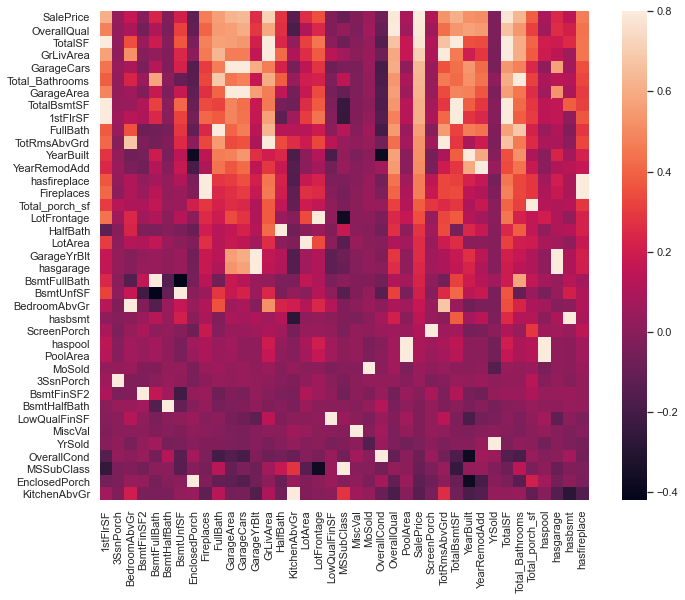

In [63]:
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

Here we can the top 10 correlated features 

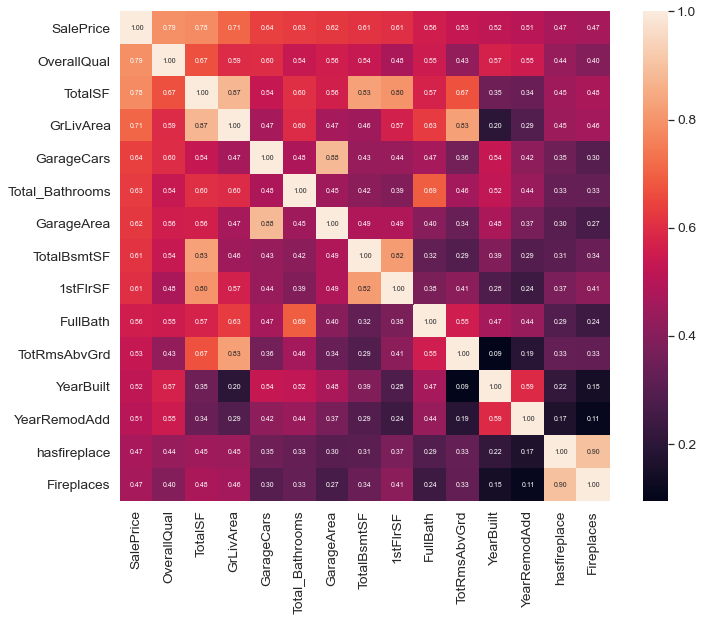

In [64]:
cols =corr['SalePrice'].head(15).index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Pair plots for variables with largest correlation

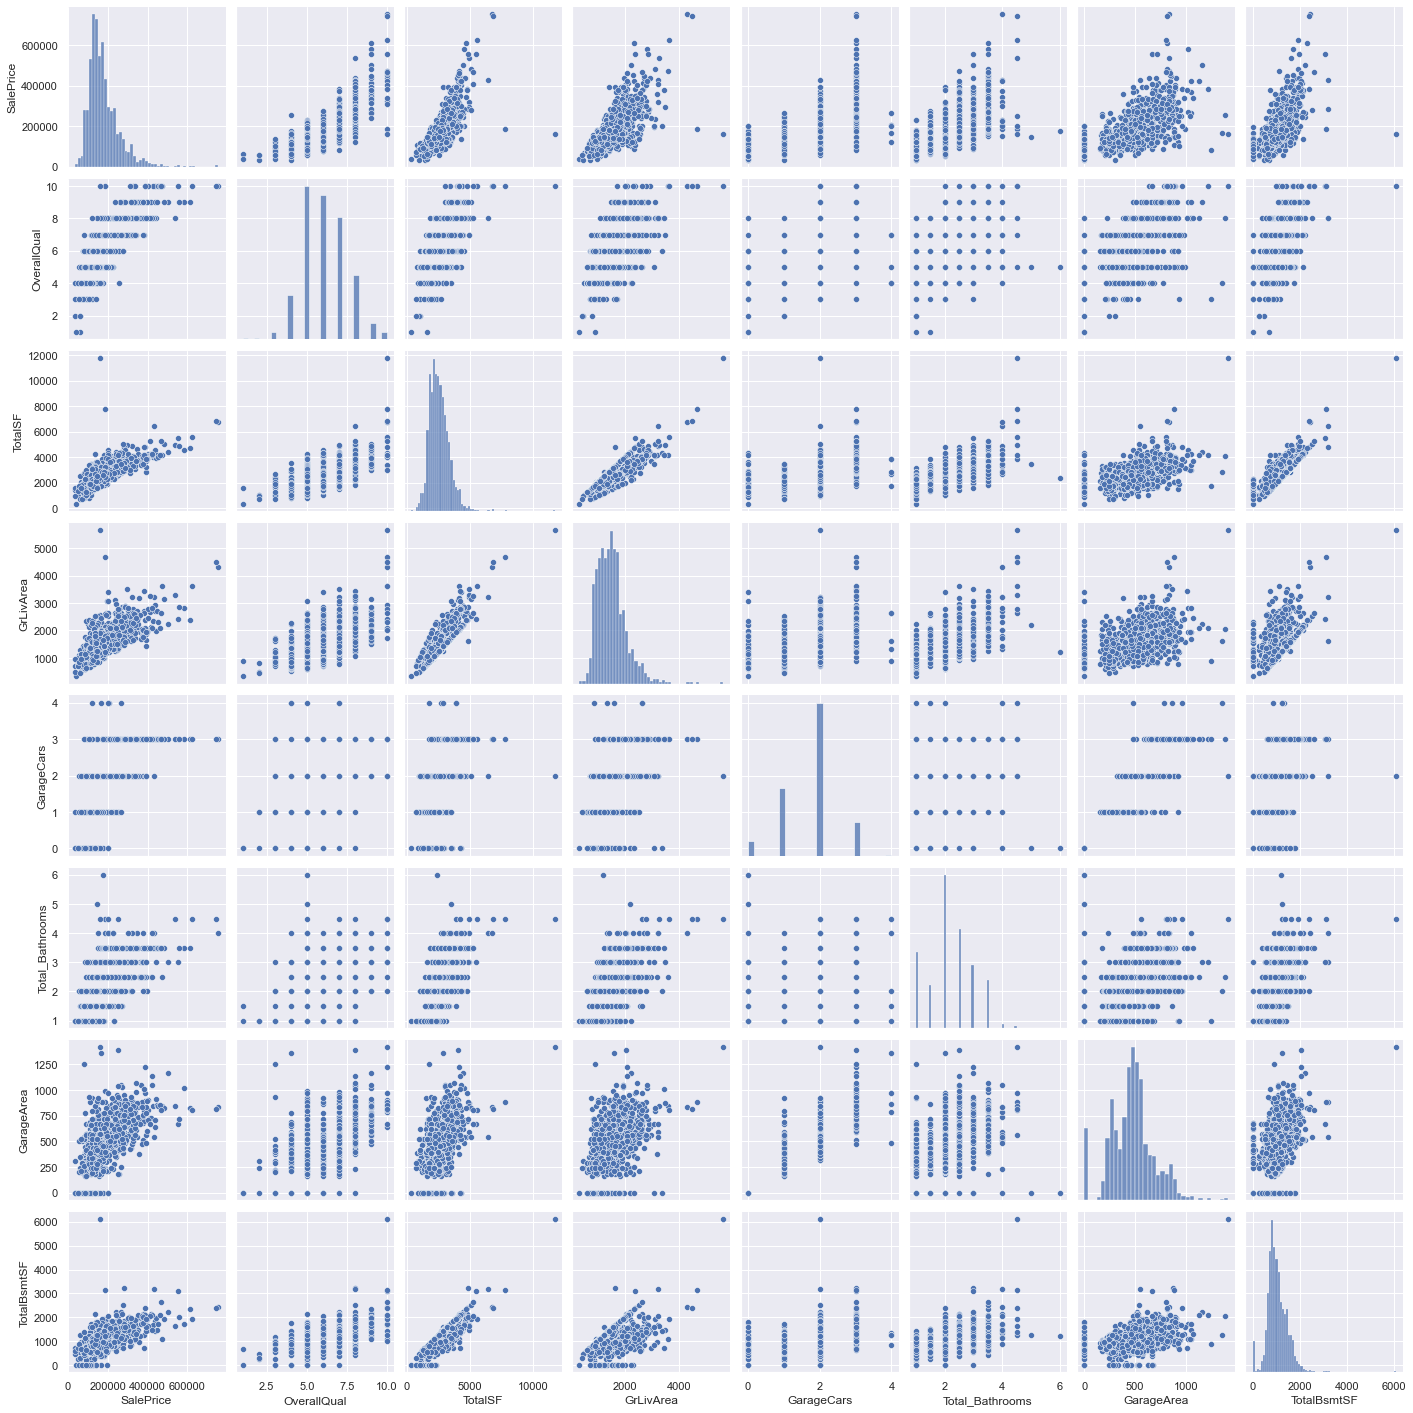

In [65]:
var_num = 8
vars = cols[0:var_num]

sns.set()
sns.pairplot(df_train[vars], size = 2.5)
plt.show();

In [66]:
print (df_train.columns)
print(df_test.columns)
print(df_train.shape,df_test.shape)

Index(['1stFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence',
       'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional',
       'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating',
       'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OverallCond',
       'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleP

## 3. Model

In [67]:
df_all = df_all.drop("SalePrice", axis = 1)
final_features = pd.get_dummies(df_all)
print(df_all.shape)
print(final_features.shape)
X_train = final_features.loc[:len(y_train)-1]
X_test = final_features.loc[len(y_train):]
X_train.shape, y_train.shape, X_test.shape


print(X_train.shape,y_train.shape,X_test.shape)

(2914, 82)
(2914, 306)
(1455, 306) (1455,) (1459, 306)


## XGBRegressor

In [395]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_train, y_train)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [396]:
print(my_model.score(X_train,y_train))

0.9999061207232084


In [397]:
preds_test = my_model.predict(X_test)

In [403]:
output = pd.DataFrame({'Id': X_test_Id, 'SalePrice': preds_test})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [136]:
from scipy import stats
stats.describe(y_train)

DescribeResult(nobs=1460, minmax=(34900.0, 755000.0), mean=180921.19589041095, variance=6311111264.297448, skewness=1.880940746034036, kurtosis=6.509812011089439)

In [402]:
stats.describe(preds_test)

DescribeResult(nobs=1459, minmax=(38423.383, 604173.9), mean=178615.66, variance=6188539400.0, skewness=1.5793790817260742, kurtosis=3.4501613006709446)

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline

pipe_rf = Pipeline([('rf', RandomForestRegressor(n_jobs = 5))])

params = {'rf__bootstrap': [True, False],
         'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'rf__max_features': ['auto', 'sqrt'],
         'rf__min_samples_leaf': [1, 2, 4],
         'rf__min_samples_split': [2, 5, 10],
         'rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

my_model = GridSearchCV(pipe_rf, params)

my_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(my_model.score(X_train,y_train))

## Support Vector Machine
### Linear

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm

In [31]:
clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
print(clf.score(X_train,y_train))

0.9993127147766323


### Poly

In [71]:
clf = svm.SVC(kernel='poly', degree = 4)

clf.fit(X_train, y_train)

SVC(degree=4, kernel='poly')

In [72]:
print(clf.score(X_train,y_train))

0.03230240549828179


### RBF

In [35]:
clf = svm.SVC(kernel='rbf')

clf.fit(X_train, y_train)

SVC()

In [36]:
print(clf.score(X_train,y_train))

0.021305841924398626


### sigmoid

In [37]:
clf = svm.SVC(kernel='sigmoid')

clf.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [38]:
print(clf.score(X_train,y_train))

0.013745704467353952


### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor
